# 1.zoo. Implement a KNN model to classify the animals in to categorie


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [24]:
data= pd.read_csv("/content/Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
#Spliting data into features and target variable
X = data.drop(columns=['type'])
y = data['type']

In [4]:
#Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['animal name']))
X_test_scaled = scaler.transform(X_test.drop(columns=['animal name']))

In [25]:
#Defining the parameters to tune
param_grid = {'n_neighbors': range(1, 20)}

In [26]:
#Initializing KNN classifier
knn = KNeighborsClassifier()

In [27]:
#performing grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [28]:
#Geting the best value of k
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 1


In [29]:
#Using the best k to train the final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [30]:
#Evaluating the final model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7674418604651163
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.71      0.71      0.71        14
           3       0.67      0.67      0.67         3
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      0.88      0.93         8

    accuracy                           0.77        43
   macro avg       0.80      0.79      0.79        43
weighted avg       0.78      0.77      0.77        43



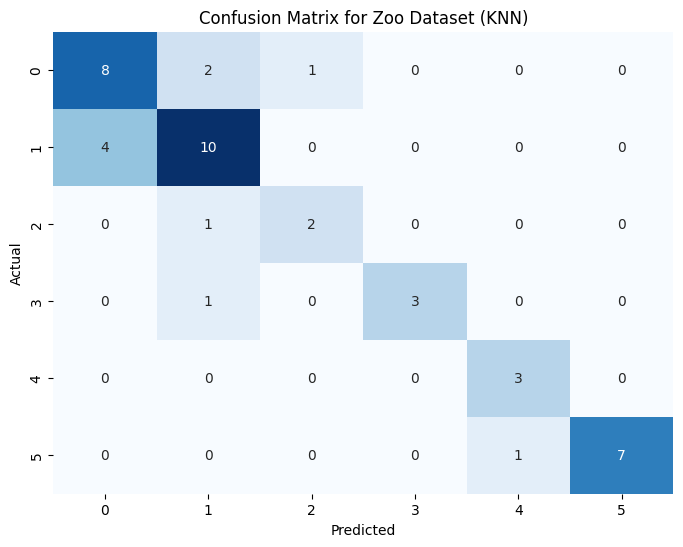

In [31]:
#Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Zoo Dataset (KNN)')
plt.show()

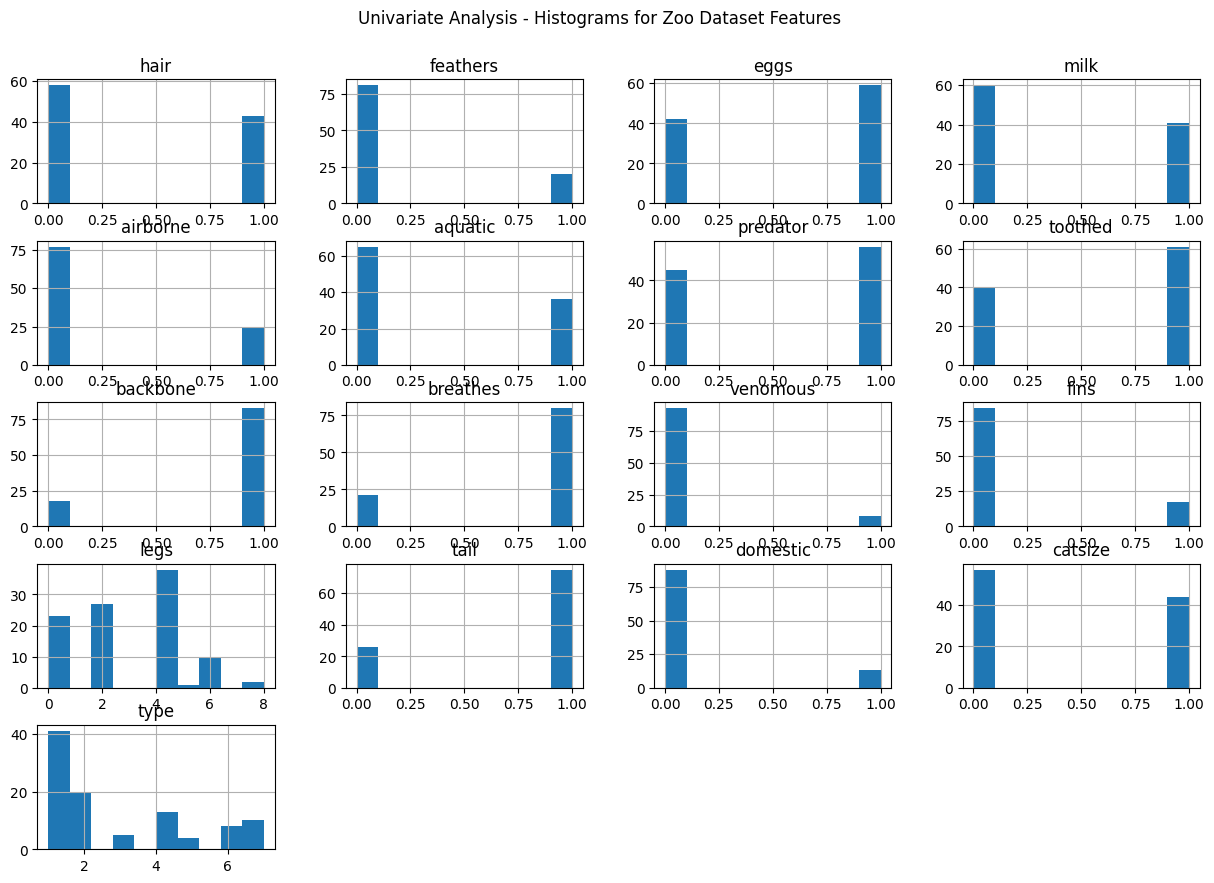

In [32]:
#Univariate Analysis - Histograms for each numerical feature
data.hist(figsize=(15, 10))
plt.suptitle('Univariate Analysis - Histograms for Zoo Dataset Features', y=0.95)
plt.show()

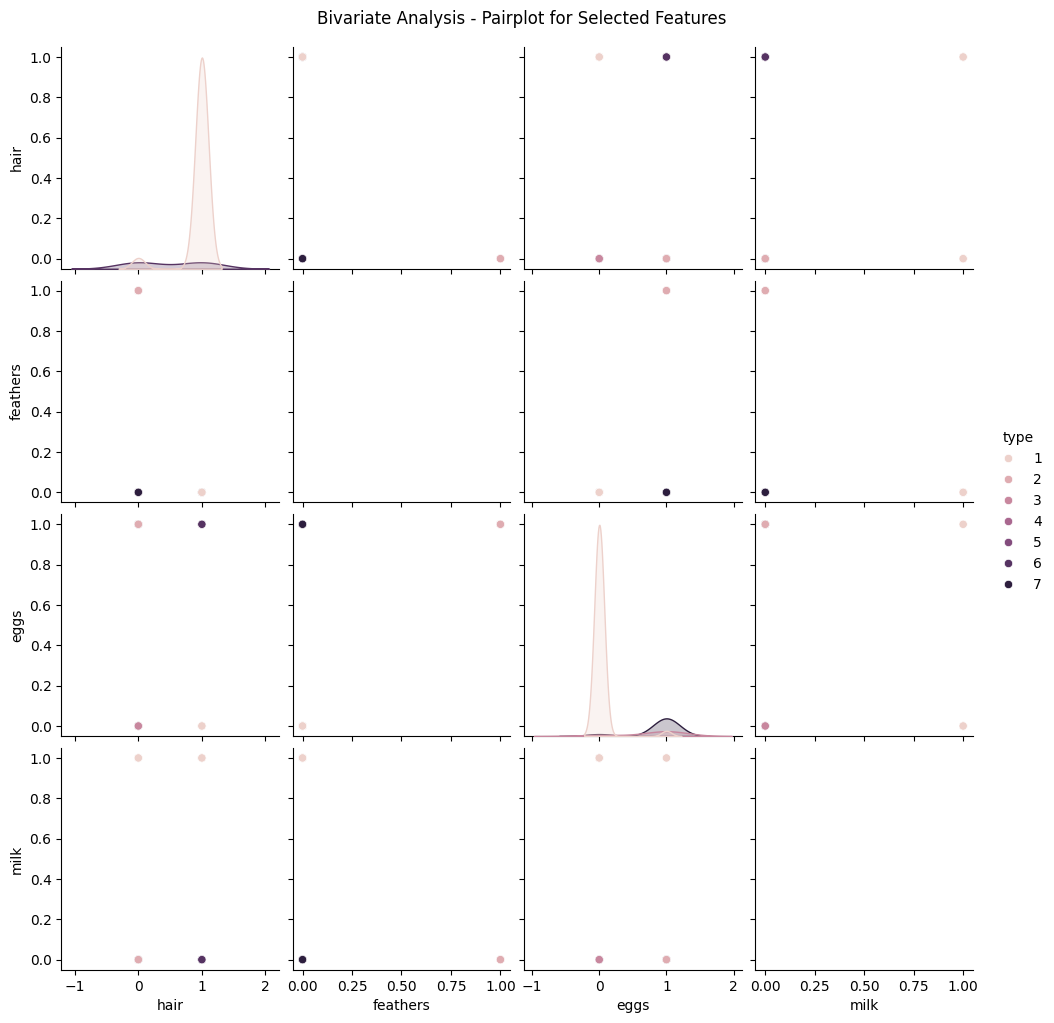

In [33]:
#bivariate analysis, Pairplot for selected features
sns.pairplot(data[['hair', 'feathers', 'eggs', 'milk', 'type']], hue='type')
plt.suptitle('Bivariate Analysis - Pairplot for Selected Features', y=1.02)
plt.show()

<ipython-input-34-bfd45b8f5436>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


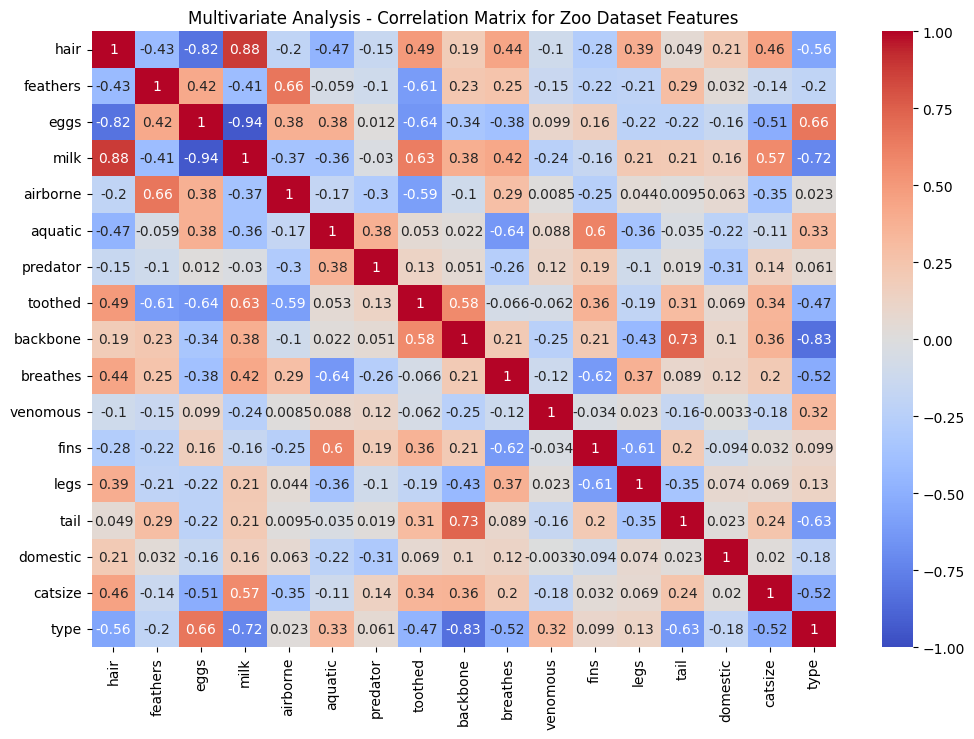

In [34]:
#Multivariate Analysis , Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Multivariate Analysis - Correlation Matrix for Zoo Dataset Features')
plt.show()

Insights


The KNN model's accuracy is approximately 77%, indicating a reasonable level of overall performance. However, it's essential to consider the precision, recall, and F1-score for each category to understand its effectiveness in classifying different animal types. For categories 1, 2, and 6, the model shows good precision and recall, suggesting it can accurately identify these animals. In contrast, for categories 3 and 5, the precision and recall are lower, indicating potential challenges in correctly classifying these animals. This could be due to similarities in features or a lack of distinct patterns for these categories in the dataset.


# 2.glass. Prepare a model for glass classification using KNN

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [50]:
df = pd.read_csv("/content/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [51]:
#Spliting the data into features and target variable
X = df.drop(columns=['Type'])
y = df['Type']

In [52]:
#Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
#Hyperparameter tuning
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [55]:
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 1


In [56]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7674418604651163
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.71      0.71      0.71        14
           3       0.67      0.67      0.67         3
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      0.88      0.93         8

    accuracy                           0.77        43
   macro avg       0.80      0.79      0.79        43
weighted avg       0.78      0.77      0.77        43



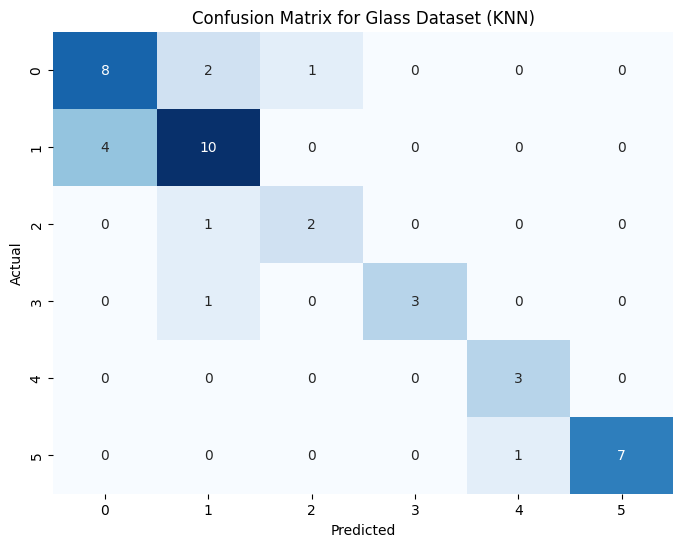

In [57]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Glass Dataset (KNN)')
plt.show()

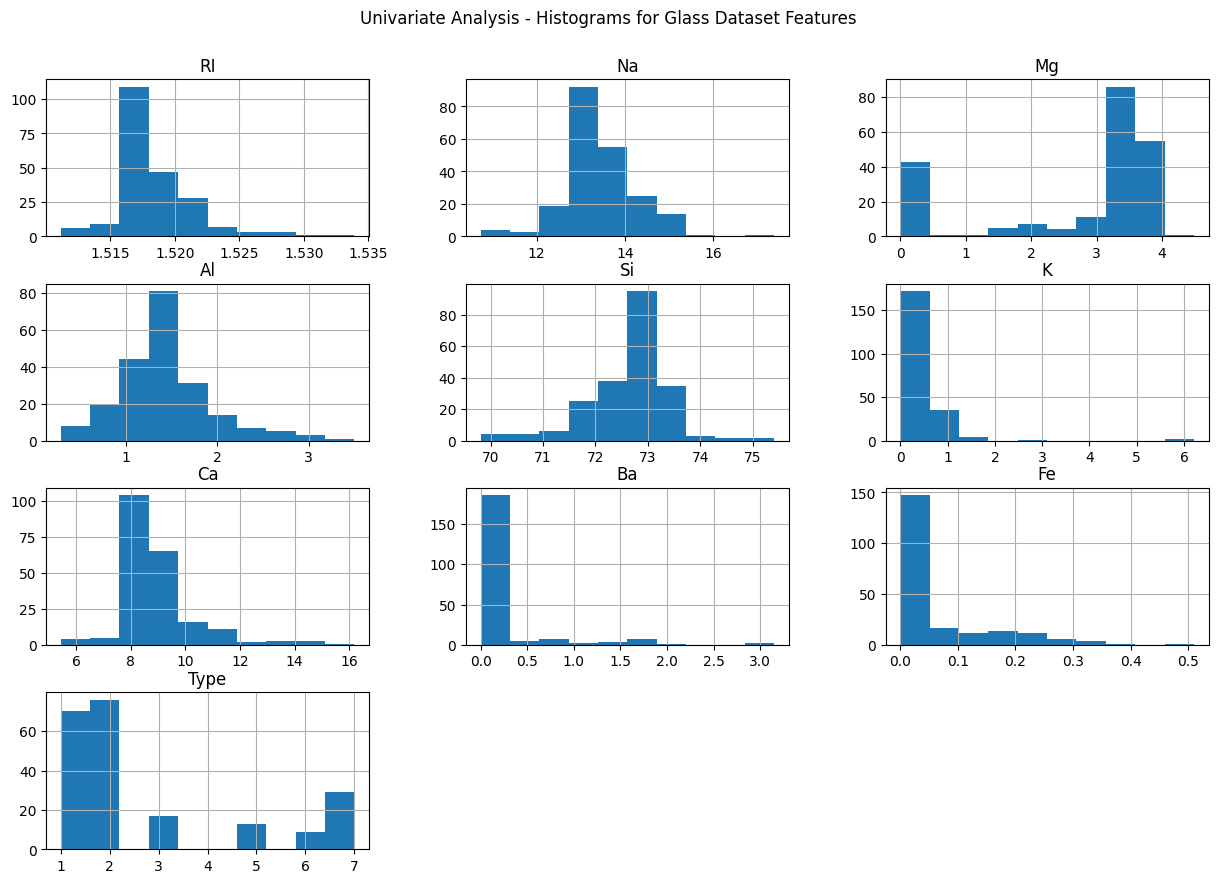

In [58]:
#Univariate Analysis , Histograms for each numerical feature
df.hist(figsize=(15, 10))
plt.suptitle('Univariate Analysis - Histograms for Glass Dataset Features', y=0.95)
plt.show()

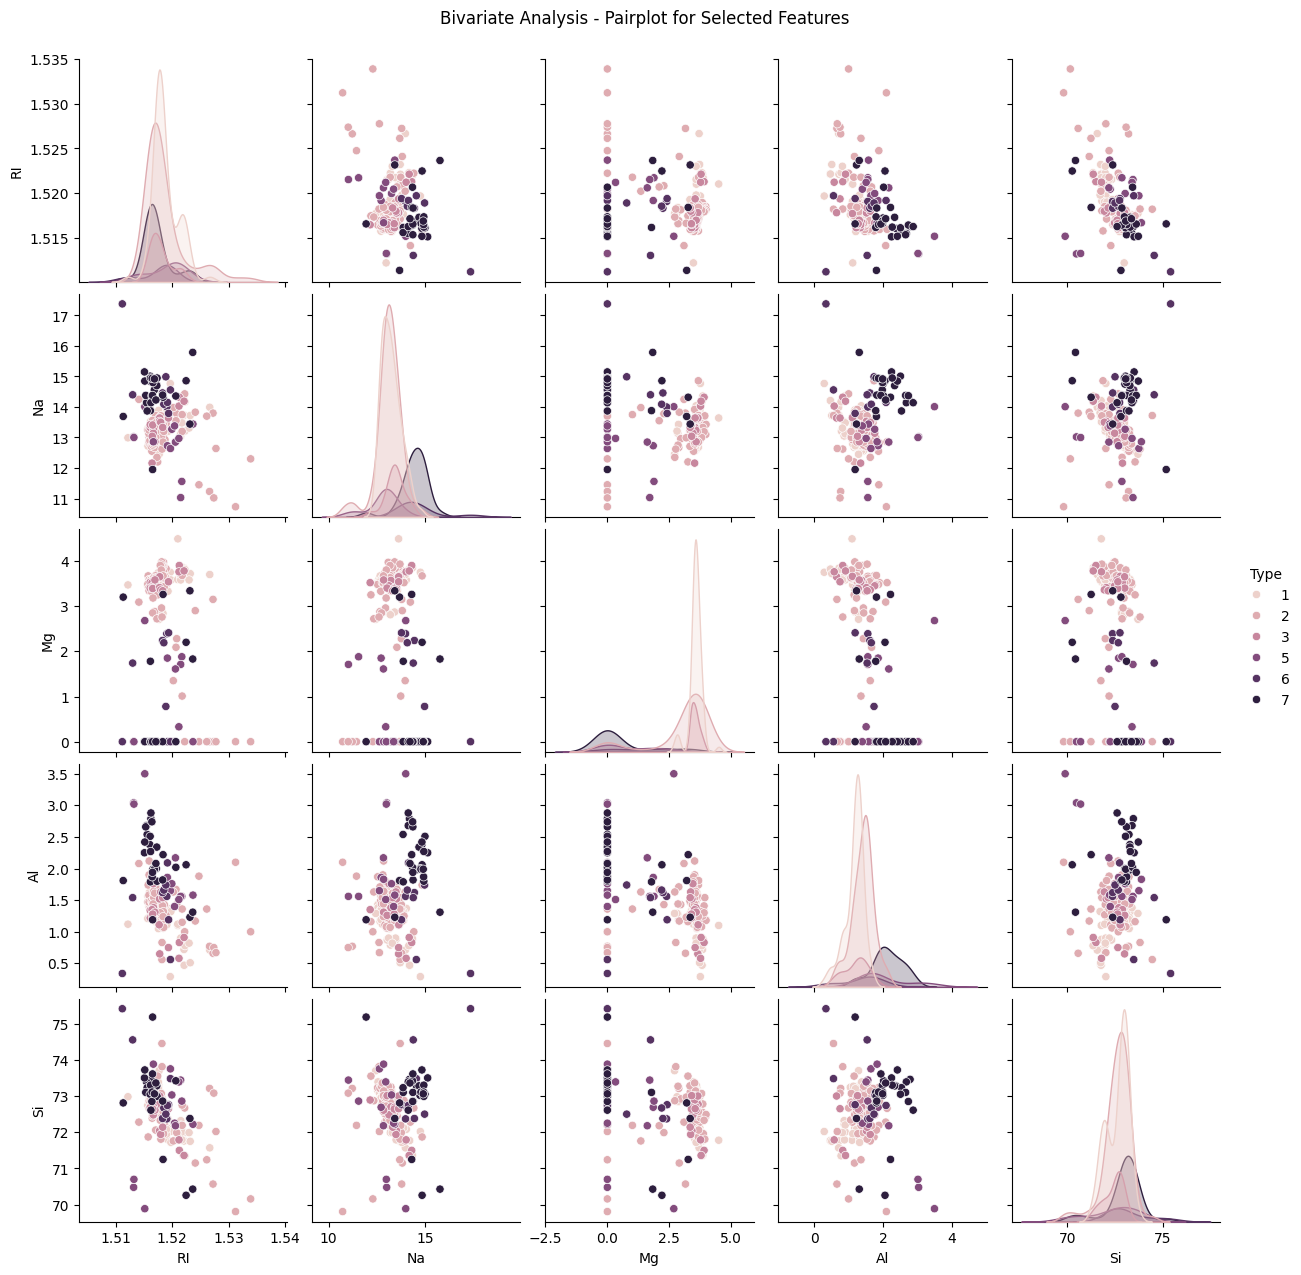

In [59]:
#Bivariate Analysis, Pairplot for selected features
sns.pairplot(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Type']], hue='Type')
plt.suptitle('Bivariate Analysis - Pairplot for Selected Features', y=1.02)
plt.show()

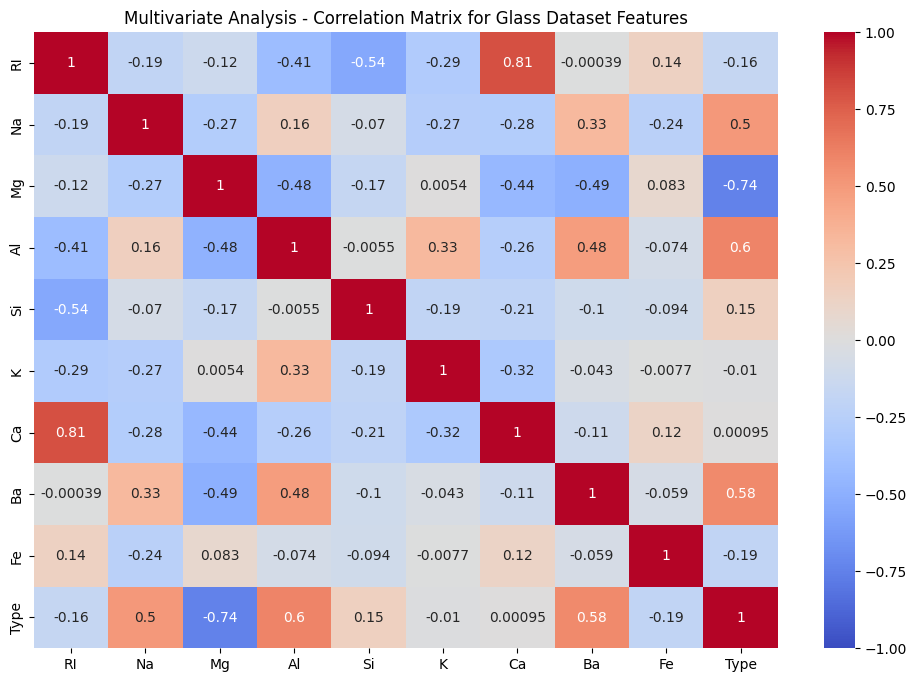

In [60]:
#Multivariate Analysis, Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Multivariate Analysis - Correlation Matrix for Glass Dataset Features')
plt.show()

The KNN model achieved an accuracy of approximately 76.74%, indicating a moderate level of accuracy in classifying the glass types.

The macro average for precision, recall, and F1-score is around 79%, indicating a balanced performance across all classes.

The weighted average for precision, recall, and F1-score is around 77%, indicating the overall performance of the model across all classes, considering the class imbalance.

Overall, the model performs reasonably well across most classes, with some variability in performance. Class 3 has the lowest performance, likely due to the small number of samples for this class.